# Checkpoint 1: Data Cleaning 1

In [1]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
with open("companies.csv",'rb') as rwdt:
    result=chardet.detect(rwdt.read())

print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4612728888532156, 'language': 'Turkish'}


In [3]:
# Following line is  throwing error on  reading,  hence using "palmos" encoding to  continue further.
# cmp=pd.read_csv("companies.csv",encoding='Windows-1254')

#### Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively

In [4]:
companies=pd.read_csv("companies.csv", sep=",", encoding='Palmos')
rounds2=pd.read_csv("rounds2.csv", sep=",", encoding='Palmos')

In [5]:
print("Shape of companies dataFrame", companies.shape)
print("Shape of rounds2 dataFrame", rounds2.shape)
#print(rounds2.columns)
#print('\n')
#print(rounds2.describe(include = 'all'))

Shape of companies dataFrame (66368, 10)
Shape of rounds2 dataFrame (114949, 6)


In [6]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,1/1/2010


In [7]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


<br>
### Q1) How many unique companies are present in rounds2? 

In [8]:
print(rounds2['company_permalink'].describe()) 

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object


In [9]:
#convert rounds2.company_permalink values to lowercase to identify duplicates correctly
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [10]:
#print("Number of duplicate rows",rounds2.duplicated().sum())  #Tell count of duplicate-rows in dataset. 0 in our case

In [11]:
# Tell Count of "company_permalink" column that have duplicate values
#print("Number of duplicate Companies in \"Orders2\": ",rounds2.company_permalink.duplicated().sum())  
#print(companies.name.duplicated(subset=['col1','col2']).sum()) # When combination of column is required for duplicate criteria

In [12]:
# Tell the properties of company_permalink column that represents a company. Now the number of Unique values is reduced
print(rounds2['company_permalink'].describe()) 

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object


In [13]:
uniqueCompanies=rounds2['company_permalink'].describe()[1]

In [14]:
print("Number of unique companies in rounds2 dataframe are: ",uniqueCompanies)

Number of unique companies in rounds2 dataframe are:  66368


In [15]:
#rounds2.loc[rounds2.duplicated(keep='first'),:] #Print first-occurence of Rows that have existing duplicated value
#rounds2.loc[rounds2.duplicated(keep='last'),:]  #Print Last-occurence of Rows that have existing duplicated value 
#rounds2.loc[rounds2.duplicated(keep=False),:]   #Print All-occurence of Rows that have existing duplicated value
#rounds2.drop_duplicates(keep='first').shape       #Drops All first first occurences of duplicate values

<br>
### Q2: How many unique companies are present in companies?

In [16]:
#companies.describe(include = 'all')

In [17]:
#companies.info()

In [18]:
#convert permalink values to lowercase to identify duplicates correctly (if any)
companies['permalink']=companies['permalink'].str.lower()
#companies['name']=companies['name'].str.lower()

In [19]:
companies.describe(include = 'all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/organization/meet-you,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,1/1/2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [20]:
uniqueCompanies2=companies['permalink'].describe()[1]
print("number of unique companies in \"companies\" DataFrame are: ", uniqueCompanies2)

number of unique companies in "companies" DataFrame are:  66368


<br>
### Q3: In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

#### Answer: Based on above table, "permalink" column seems to have all unique values. Hence it can be used 

<br><br>
### Q4: Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
### Answer: 

In [21]:
print("total companies including duplicates in round2: ", rounds2['company_permalink'].describe()[0])
print("total companies including duplicates in companies: ", companies['permalink'].describe()[0])

total companies including duplicates in round2:  114949
total companies including duplicates in companies:  66368


In [22]:
#remove duplicate values for permalink in  both tables
temp_rounds2=rounds2.drop_duplicates(subset=['company_permalink'], keep='first')
temp_companies=companies.drop_duplicates(subset=['permalink'], keep='first')

In [23]:
# Number of copanies present in rounds2 but not present in companies
a=(companies['permalink'].describe()[0])-(temp_rounds2['company_permalink'].isin(temp_companies['permalink']).sum())
print("Number of copanies present in rounds2 but not present in companies: ",a)

Number of copanies present in rounds2 but not present in companies:  68


In [24]:
# List of companies present in rounds2 but not present in companies
temp_rounds2[~temp_rounds2['company_permalink'].isin(temp_companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10â°north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,nan
729,/organization/51wofang-æ— å¿§æˆ‘æˆ¿,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,"5,000,000.00"
2670,/organization/adslinkedâ„¢,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,"100,000.00"
3166,/organization/aesthetic-everythingâ®-social-ne...,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,nan
3291,/organization/affluent-attachã©-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,"100,000.00"
4568,/organization/allgã¤u-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,"1,400,000.00"
8097,/organization/asiansbookâ„¢,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,"100,000.00"
8652,/organization/atã¶lye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,"13,940.00"
9784,/organization/axã¨gaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,"4,094,392.00"
14311,/organization/borã©al-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,nan


#### Answer: YES there are companies not present in both
<br>
### Q5: Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

#### Merge both DFs on companies.permalink and rounds2.company_permalink

In [25]:
master_frame = pd.merge(rounds2,companies,how='left',left_on='company_permalink',right_on='permalink')

In [26]:
print("Master Frame Shape is: ",master_frame.shape)
print("")
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

Master Frame Shape is:  (114949, 16)



company_permalink                         0.00
funding_round_permalink                   0.00
funding_round_type                        0.00
funding_round_code                       72.91
funded_at                                 0.00
raised_amount_usd                        17.39
permalink                                 0.06
name                                      0.07
homepage_url                              5.39
category_list                             3.01
status                                    0.06
country_code                              7.58
state_code                                9.55
region                                    8.87
city                                      8.87
founded_at                               17.89
dtype: float64

##### 1) "funding_round_code"  and "founded_at" columns may not be required for analysis. hence, we can leave them as they'll not affect further analysis
##### 2) "raised_amount_usd" is most important for analysis, and if we're using mean/median values, we can ignore the missing values for now. as either imputing or deleting these rows may affect analysis.

In [27]:
print("number of observations im MasterFrame are: ",len(master_frame.index))

number of observations im MasterFrame are:  114949


In [28]:
#temp_companies['permalink'] = temp_companies.permalink.astype(str)
#temp_rounds2['company_permalink'] = temp_rounds2.company_permalink.astype(str)
# Move the values "company_permalink" and "permalink" in single dataframe and compare
#temp = pd.DataFrame(columns=['company_permalink','rounds2_permalink'])
#temp['company_permalink']=temp_companies['permalink']
#temp['rounds2_permalink']=temp_rounds2.iloc[:,0].values
#temp=pd.concat([temp,temp_rounds2], axis=1)
#temp['rounds2_perm']=temp_rounds2['company_permalink']

In [29]:
#compare if values match in both tempc and tempo, if they match => all unique values in companies and rounds2 match
#tempc['orders2_perm']=tempo.iloc[:,0].values
#temp

<br>
# Checkpoint 2: Funding Type Analysis

<br>
### Q 1/2/3/4: Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)
<br>
##### Do analysis of Mean and Median values grouping by the  Funding-RoundType

##### Groupby Results show that the mean value is very high due to outliers. Hence Meadian values can be considered to identify ideal funding 

In [30]:
master_frame.groupby('funding_round_type').raised_amount_usd.describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,"4,860.00","958,694.47","7,404,397.12",0.00,"150,000.00","400,000.00","1,000,000.00","494,511,992.00"
convertible_note,"1,447.00","1,453,438.54","8,043,846.14",0.00,"78,847.50","272,000.00","1,000,000.00","185,048,285.00"
debt_financing,"6,682.00","17,043,526.02","280,320,356.61",0.00,"330,484.25","1,100,000.00","4,000,000.00","21,271,935,000.00"
equity_crowdfunding,"1,228.00","538,368.21","1,719,329.42",0.00,"7,000.00","100,000.00","395,901.00","27,400,000.00"
grant,"2,124.00","4,300,576.34","25,587,424.15",0.00,"50,000.00","201,684.00","1,700,000.00","750,000,000.00"
non_equity_assistance,73.00,"411,203.05","1,771,747.25",0.00,"25,000.00","60,000.00","125,000.00","15,000,000.00"
post_ipo_debt,152.00,"168,704,571.82","602,473,804.43","70,000.00","4,000,000.00","19,950,000.00","60,000,000.00","5,800,000,000.00"
post_ipo_equity,628.00,"82,182,493.87","469,188,915.85",77.00,"3,764,794.00","12,262,852.50","40,000,000.00","10,664,943,639.00"
private_equity,"1,936.00","73,308,593.03","198,113,458.41",0.00,"5,000,000.00","20,000,000.00","75,000,000.00","4,745,460,219.00"


##### Pick rows with "funding_round_type" values ['seed','angel','venture','private_equity' ] in a separate dataframe

In [31]:
options = ['seed','angel','venture','private_equity'] 
master_sub = master_frame.loc[master_frame['funding_round_type'].isin(options)]
print("Representative values for 'seed','angel','venture','private_equity'")
master_sub.groupby('funding_round_type').raised_amount_usd.median()

Representative values for 'seed','angel','venture','private_equity'


funding_round_type
angel                      400,000.00
private_equity          20,000,000.00
seed                       275,000.00
venture                  5,000,000.00
Name: raised_amount_usd, dtype: float64

<br>
#### Q5: Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?


#### Find the count/mean/std-dev/quartile values for raised amount grouped by funding_round_type to get most suitable investment type

In [32]:
#a=len(master_sub.index)
#round(((master_sub.isnull().sum()/a)*100),2)

In [33]:
master_sub.groupby('funding_round_type').describe()

raised_amount_usd                       \
                                  count                 mean   
funding_round_type                                             
angel                          4,860.00           958,694.47   
private_equity                 1,936.00        73,308,593.03   
seed                          23,603.00           719,818.00   
venture                       50,228.00        11,748,949.13   

                                                              \
                                    std                  min   
funding_round_type                                             
angel                      7,404,397.12                 0.00   
private_equity           198,113,458.41                 0.00   
seed                       2,221,732.80                 0.00   
venture                   86,352,066.56                 0.00   

                                                              \
                                    25%                  50%   
funding_round_type                                             
angel                        150,000.00           400,000.00   
private_equity             5,000,000.00        20,000,000.00   
seed                          55,000.00           275,000.00   
venture                    1,600,901.75         5,000,000.00   

                                                              
                                    75%                  max  
funding_round_type                                            
angel                      1,000,000.00       494,511,992.00  
private_equity            75,000,000.00     4,745,460,219.00  
seed                       1,000,000.00       200,000,000.00  
venture                   12,000,000.00    17,600,000,000.00

#### Answer: "venture" seems to be the most followed investment option as it has a count of 50,228 and most values lie within 12-Million in  75% quartile. This value is well within range of 5-15 Million dollar that is available for investment

<br>
# Checkpoint 3: Country Analysis

##### a) Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type
##### b) For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [34]:
df_venture=master_sub.loc[master_sub['funding_round_type'] == 'venture',:]

In [35]:
df_venture.shape

(55494, 16)

<br>
##### group by "country_code" and sort by by Total "raised_amount_usd" in this dataframe.

In [36]:
df_venture.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False)

country_code
USA     422,510,842,796.00
CHN      39,835,418,773.00
GBR      20,245,627,416.00
IND      14,391,858,718.00
CAN       9,583,332,317.00
FRA       7,241,142,340.00
ISR       6,907,514,579.00
DEU       6,345,559,822.00
JPN       3,363,676,611.00
SWE       3,254,952,563.00
NLD       2,939,403,619.00
CHE       2,827,560,264.00
SGP       2,793,917,856.00
ESP       1,835,831,452.00
BRA       1,785,986,890.00
IRL       1,676,131,350.00
RUS       1,570,426,005.00
AUS       1,322,934,948.00
DNK       1,228,310,641.00
BEL       1,070,542,301.00
FIN       1,043,199,709.00
NOR         956,192,413.00
KOR         939,988,262.00
MYS         883,058,787.00
HKG         781,266,982.00
AUT         630,954,952.00
TWN         623,979,485.00
TUR         559,048,277.00
ITA         488,289,353.00
NZL         448,316,383.00
              ...         
GRC          10,743,775.00
BAH           8,900,000.00
TTO           8,500,000.00
SVK           8,241,062.00
BGD           7,002,000.00
LBN           6

<br>
###### Find top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
Apply head(9) to above code and get top-9 entries in descending order of total investment amount

In [37]:
a=df_venture.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False).head(9)
a

country_code
USA     422,510,842,796.00
CHN      39,835,418,773.00
GBR      20,245,627,416.00
IND      14,391,858,718.00
CAN       9,583,332,317.00
FRA       7,241,142,340.00
ISR       6,907,514,579.00
DEU       6,345,559,822.00
JPN       3,363,676,611.00
Name: raised_amount_usd, dtype: float64

In [38]:
top9 = df_venture[df_venture['country_code'].isin(list(a.index) )]

In [39]:
top9.shape

(48096, 16)

##### Answer2: Top 3 english  speaking countries from above list are: USA, GBR, IND

<br>
# Checkpoint 4: Sector Analysis 1
### Finding the best sectors in top 3 English speaking countries

In [40]:
#Create a sub-list of top-3 countries from top9 dataframe
top3=top9[top9['country_code'].isin(['USA','GBR','IND'])]

In [41]:
top3.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,1/1/2010
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,1/1/2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,1/1/2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,1/1/2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,1/3/2012
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,"4,000,000.00",/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,1/1/2013
33,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,nan,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,1/1/2008
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,"2,520,000.00",/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,1/7/2010


In [42]:
# Add new column "primary_Sector" by taking first values in "category_list" before the pipe delimiter
pd.set_option('mode.chained_assignment', None)
temp = top3['category_list'].str.split('|').str[0]
top3['primary_sector']=temp.values
top3['primary_sector'] = top3['primary_sector'].str.lower()

<br> Check for first or last 100 entries whether the 'primary_sector' is added properly

In [43]:
#top3.tail(100)
top3.head(100)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014,application platforms
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,1/1/2010,software
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,1/1/2011,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,1/1/2011,analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,1/1/2011,analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,1/3/2012,apps
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,"4,000,000.00",/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,1/1/2013,education
33,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,nan,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,1/1/2008,beauty
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,"2,520,000.00",/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,1/7/2010,curated web


In [44]:
mapping = pd.read_csv("mapping.csv",sep=",",encoding = "palmos")

In [47]:
mapping.shape

(688, 10)

<br>
##### Take  out the "main_sectors" and "categories" lists from Mapping sheet

In [48]:
main_sectors=list(mapping.columns[1:])
main_sectors

['Automotive & Sports',
 'Blanks',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [49]:
categories=list(np.setdiff1d(mapping.columns,main_sectors))
categories

['category_list']

<br>
#### Create new dataframe "long_df" of 2 columns "category_list" and "main_sector" using the mapping sheet

In [50]:
long_df=pd.melt(mapping,id_vars=categories,value_vars=main_sectors)

In [51]:
long_df

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
5,Active Lifestyle,Automotive & Sports,0
6,Ad Targeting,Automotive & Sports,0
7,Advanced Materials,Automotive & Sports,0
8,Adventure Travel,Automotive & Sports,1
9,Advertising,Automotive & Sports,0


In [52]:
#remove rows with 0 value in long_df
long_df=long_df[long_df['value']==1]
long_df=long_df.drop('value', axis=1)

In [53]:
# Rename 'variable' to 'main_sector'
long_df=long_df.rename(columns={'variable':'main_sector'})
long_df.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [54]:
#convert values to lowercase
long_df['category_list'] = long_df['category_list'].str.lower()
long_df['main_sector'] = long_df['main_sector'].str.lower()

In [55]:
long_df.shape

(688, 2)

<br>
### join data frame "top3" with each "long_df" to map each primary sector to one of the eight main sectors in new dataset "venture_sector"

In [56]:
venture_sector = pd.merge(top3,long_df,how='inner',left_on='primary_sector',right_on='category_list')

In [57]:
venture_sector

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,media,entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,"15,000,000.00",/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,1/1/2011,media,media,entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,"5,800,000.00",/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,1/1/2011,media,media,entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,"18,000,000.00",/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,1/1/2011,media,media,entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,"5,000,000.00",/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,media,media,entertainment
5,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,"650,000.00",/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,1/5/2008,media,media,entertainment
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,"750,000.00",/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,1/5/2008,media,media,entertainment
7,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,NaN,15-02-2012,"1,582,300.00",/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,1/5/2008,media,media,entertainment
8,/organization/babble,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,A,05-02-2009,"2,000,000.00",/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,1/12/2006,media,media,entertainment
9,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,"1,250,000.00",/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,1/12/2006,media,media,entertainment


In [58]:
venture_sector.shape

(38815, 19)

<br>
<br>
# Checkpoint 5: Sector Analysis 2

<br><br>
#### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range

In [59]:
#Drop all rows whose "raised_amount_usd" is not in range of 5-15 Million  range
venture_sector = venture_sector[(venture_sector['raised_amount_usd'] >= 5000000) 
                                & (venture_sector['raised_amount_usd'] <= 15000000)]
venture_sector.shape

(12120, 19)

In [60]:
venture_sector.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,media,entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,"15,000,000.00",/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,1/1/2011,media,media,entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,"5,800,000.00",/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,1/1/2011,media,media,entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,"5,000,000.00",/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,media,media,entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,"5,000,000.00",/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,1/1/2012,media,media,entertainment


<br>
##### Visualize the currency grouped by main_sector in a double index table

In [61]:
venture_sector.groupby(['country_code','main_sector']).raised_amount_usd.describe()

count  \
country_code main_sector                                                    
GBR          automotive & sports                                    16.00   
             blanks                                                  7.00   
             cleantech / semiconductors                            127.00   
             entertainment                                          54.00   
             health                                                 24.00   
             manufacturing                                          42.00   
             news, search and messaging                             73.00   
             others                                                143.00   
             social, finance, analytics, advertising                98.00   
IND          automotive & sports                                    13.00   
             blanks                                                  2.00   
             cleantech / semiconductors                             20.00   
             entertainment                                          33.00   
             health                                                 19.00   
             manufacturing                                          21.00   
             news, search and messaging                             52.00   
             others                                                109.00   
             social, finance, analytics, advertising                32.00   
USA          automotive & sports                                   167.00   
             blanks                                                 86.00   
             cleantech / semiconductors                          2,297.00   
             entertainment                                         580.00   
             health                                                908.00   
             manufacturing                                         799.00   
             news, search and messaging                          1,563.00   
             others                                              2,923.00   
             social, finance, analytics, advertising             1,912.00   

                                                                     mean  \
country_code main_sector                                                    
GBR          automotive & sports                            10,440,722.81   
             blanks                                          8,252,121.14   
             cleantech / semiconductors                      8,952,007.94   
             entertainment                                   8,546,501.09   
             health                                          8,939,062.92   
             manufacturing                                   8,617,627.02   
             news, search and messaging                      8,434,879.93   
             others                                          8,735,134.89   
             social, finance, analytics, advertising         8,386,615.89   
IND          automotive & sports                            10,530,769.23   
             blanks                                         13,500,000.00   
             cleantech / semiconductors                      8,269,000.00   
             entertainment                                   8,510,000.00   
             health                                          8,828,421.05   
             manufacturing                                   9,566,666.67   
             news, search and messaging                      8,342,972.02   
             others                                          9,242,289.06   
             social, finance, analytics, advertising         9,079,484.38   
USA          automotive & sports                             8,707,211.74   
             blanks                                          8,892,596.42   
             cleantech / semiconductors                      9,221,159.35   
             entertainment                                   8,

#### Create three dataframes "D1,D2,D3" for top 3 countries from  the parent dataframe "venture_sector"

In [62]:
D1 = venture_sector[(venture_sector['country_code'] == 'USA')]
D2 = venture_sector[(venture_sector['country_code'] == 'GBR')]
D3 = venture_sector[(venture_sector['country_code'] == 'IND')]

<br>
#### Q1: Total number of Investments (count) for Country1, Country2, Country3 for Venture FT

In [63]:
# Country-1: USD 
D1.raised_amount_usd.count()

11235

In [64]:
# Country-2: GBR
D2.raised_amount_usd.count()

584

In [65]:
# Country-3: IND
D3.raised_amount_usd.count()

301

<br>
#### Q2: Total amount of investment (USD) for Country1, Country2, Country3 for Venture FT

In [66]:
# Country-1: USD 
D1.raised_amount_usd.sum()

100426287841.0

In [67]:
# Country-2: GBR 
D2.raised_amount_usd.sum()

5086469206.0

In [69]:
# Country-3: IND 
D3.raised_amount_usd.sum()

2710537552.0

<br>
#### Q 3/4/5/6/7/8:  Top 3 sectors (based on count of investments)

In [70]:
# Country-1: USA 
D1.groupby('main_sector').raised_amount_usd.count().sort_values(ascending=False).head(3)

main_sector
others                                     2923
cleantech / semiconductors                 2297
social, finance, analytics, advertising    1912
Name: raised_amount_usd, dtype: int64

In [71]:
# Country-2: GBR 
D2.groupby('main_sector').raised_amount_usd.count().sort_values(ascending=False).head(3)

main_sector
others                                     143
cleantech / semiconductors                 127
social, finance, analytics, advertising     98
Name: raised_amount_usd, dtype: int64

In [72]:
# Country-3: IND 
D3.groupby('main_sector').raised_amount_usd.count().sort_values(ascending=False).head(3)

main_sector
others                        109
news, search and messaging     52
entertainment                  33
Name: raised_amount_usd, dtype: int64

<br><br>
#### Q9: which company received the highest investment (For top sector by count)?

##### We get same result either when Sub-grouping by "name" or by "company_permalink". 

In [73]:
# Country-1: USA 
#D1[D1['main_sector']=='others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)
D1[D1['main_sector']=='others'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

main_sector  name             
others       Virtustream                64,300,000.00
             Capella Photonics          54,968,051.00
             AirTight Networks          54,201,907.00
Name: raised_amount_usd, dtype: float64

In [74]:
# Country-2: GBR 
#D2[D2['main_sector']=='others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)
D2[D2['main_sector']=='others'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

main_sector  name          
others       Electric Cloud          37,000,000.00
             SenSage                 36,250,000.00
             Enigmatec               32,500,000.00
Name: raised_amount_usd, dtype: float64

In [75]:
# Country-3: IND 
#D3[D3['main_sector']=='others'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)
D3[D3['main_sector']=='others'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

main_sector  name        
others       FirstCry.com          39,000,000.00
             Myntra                38,000,000.00
             CommonFloor           32,900,000.00
Name: raised_amount_usd, dtype: float64

<br><br>
#### Q10: which company received the highest investment (For second sector by count)?
here "groupby" for "name" and "company_permalink", fields both give same result. so "name" is used

In [76]:
# Country-1: USA 
#D1[D1['main_sector']=='cleantech / semiconductors'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)
D1[D1['main_sector']=='cleantech / semiconductors'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

main_sector                 name         
cleantech / semiconductors  Biodesix               75,300,000.00
                            Tigo Energy            68,739,496.00
                            ForSight Labs          61,300,001.00
Name: raised_amount_usd, dtype: float64

In [77]:
# Country-2: GBR 
#D2[D2['main_sector']=='cleantech / semiconductors'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)
D2[D2['main_sector']=='cleantech / semiconductors'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

main_sector                 name                        
cleantech / semiconductors  EUSA Pharma                           35,600,000.00
                            Horizon Discovery                     31,353,719.00
                            F-star Biotechnology Limited          29,132,906.00
Name: raised_amount_usd, dtype: float64

In [78]:
# Country-3: IND 
#D3[D3['main_sector']=='news, search and messaging'].groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head(3)
D3[D3['main_sector']=='news, search and messaging'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)

main_sector                 name       
news, search and messaging  GupShup              33,000,000.00
                            IMImobile            23,000,000.00
                            SMS GupShup          22,000,000.00
Name: raised_amount_usd, dtype: float64

<br><br>
# Checkpoint 6: Plots

#### Q1: A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds

In [79]:
# master_sub dataframe contains top 4 funding types
master_sub.groupby('funding_round_type').describe()

raised_amount_usd                       \
                                  count                 mean   
funding_round_type                                             
angel                          4,860.00           958,694.47   
private_equity                 1,936.00        73,308,593.03   
seed                          23,603.00           719,818.00   
venture                       50,228.00        11,748,949.13   

                                                              \
                                    std                  min   
funding_round_type                                             
angel                      7,404,397.12                 0.00   
private_equity           198,113,458.41                 0.00   
seed                       2,221,732.80                 0.00   
venture                   86,352,066.56                 0.00   

                                                              \
                                    25%                  50%   
funding_round_type                                             
angel                        150,000.00           400,000.00   
private_equity             5,000,000.00        20,000,000.00   
seed                          55,000.00           275,000.00   
venture                    1,600,901.75         5,000,000.00   

                                                              
                                    75%                  max  
funding_round_type                                            
angel                      1,000,000.00       494,511,992.00  
private_equity            75,000,000.00     4,745,460,219.00  
seed                       1,000,000.00       200,000,000.00  
venture                   12,000,000.00    17,600,000,000.00

<br>
### Plot showing "Median" of each Funding Type for "angel, private-equity, seed, venture". It is clear that most investors prefer "venture" funding-type in range 5 Million to 15 Million range

[Text(0,0.5,'Funding Type'), Text(0.5,0,'Median Funding amount in Millions')]

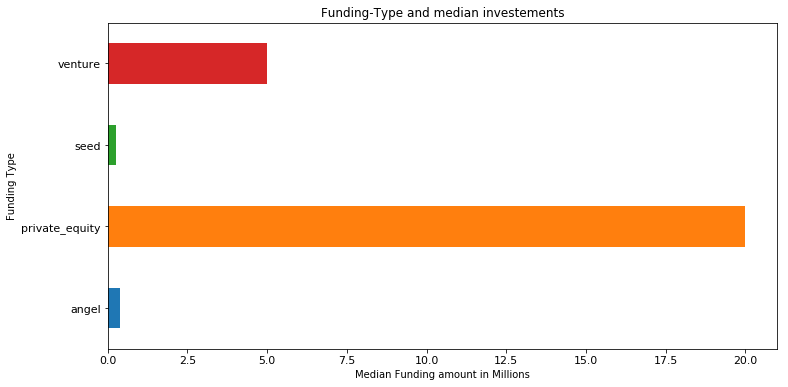

In [80]:
x=master_sub.groupby('funding_round_type').raised_amount_usd.median()/1000000
plotx=x.plot.barh(figsize=(12,6), fontsize=11, title="Funding-Type and median investements")
plotx.set(xlabel="Median Funding amount in Millions",ylabel="Funding Type")

<br>
### Plot showing the top 9 countries against the total amount of investments of funding type FT. This clearly shows the top 3 english countries (USA, GBR, and IND) very clear. 

[Text(0,0.5,'Country'), Text(0.5,0,'Total Investment in Billions x 100')]

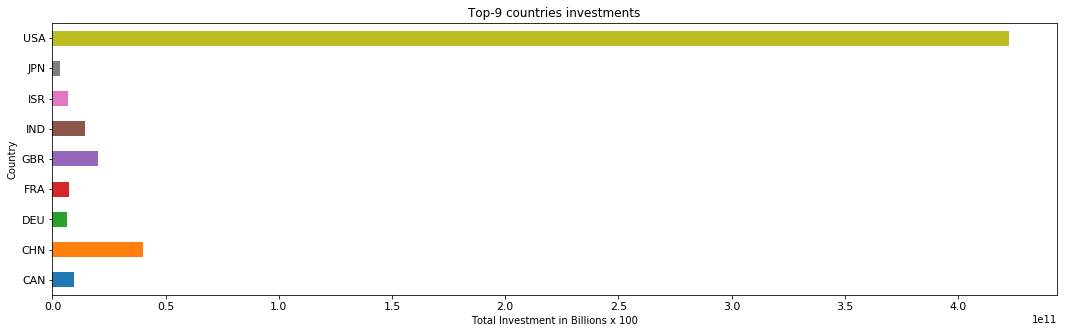

In [81]:
x=top9.groupby('country_code').raised_amount_usd.sum()
plotx=x.plot.barh(figsize=(18,5), fontsize=11, title="Top-9 countries investments")
plotx.set(xlabel="Total Investment in Billions x 100",ylabel="Country")

<br><br>
### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3

#### Merge D1, D2, D3 based on their top-3 main_sectors, to get the dataset for top3 countries and top-3 main_sectors

In [82]:
merged_df=D1[D1['main_sector'].isin(['others','cleantech / semiconductors','social, finance, analytics, advertising'])]

In [83]:
merged_df=merged_df.append(D2[D2['main_sector'].isin(['others','cleantech / semiconductors','social, finance, analytics, advertising'])], ignore_index=True)

In [84]:
merged_df=merged_df.append(D3[D3['main_sector'].isin(['others','news, search and messaging','entertainment'])], ignore_index=True)

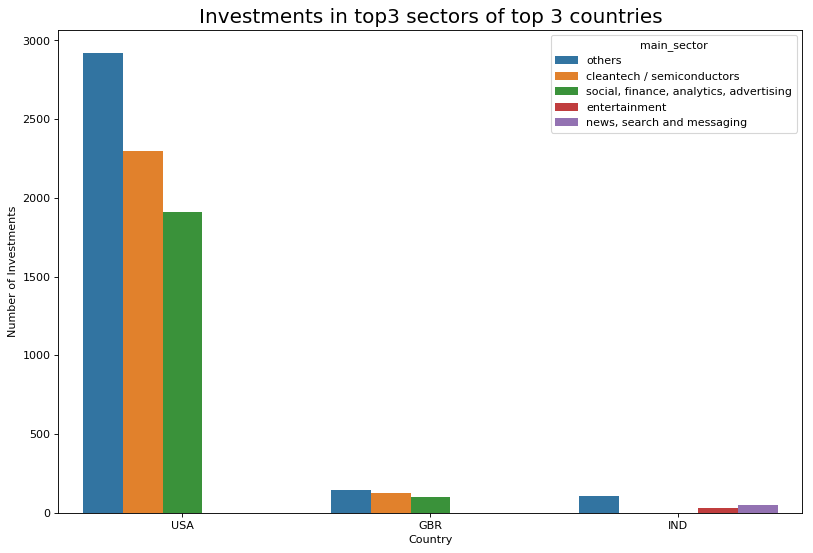

In [85]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import seaborn as sns
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=merged_df,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()